Survival rate for passengers from Queenstown: 38.96%
Survival rate for passengers in the lowest fare quartile: 19.73%


<ipython-input-2-b522c312b2c0>:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_survival_rates = titanic_data.groupby('AgeGroup')['Survived'].mean() * 100
<ipython-input-2-b522c312b2c0>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_survival_rates.index, y=age_group_survival_rates.values, palette="viridis")


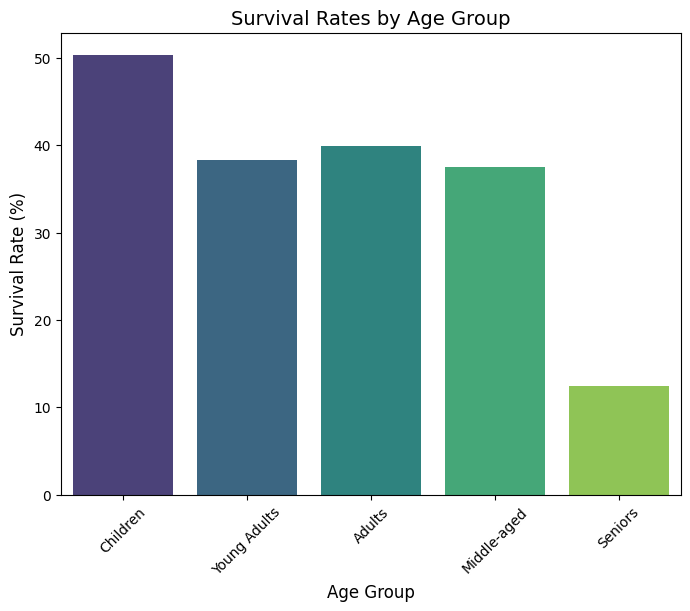

Survival rate for adult males in the second class: 6.82%


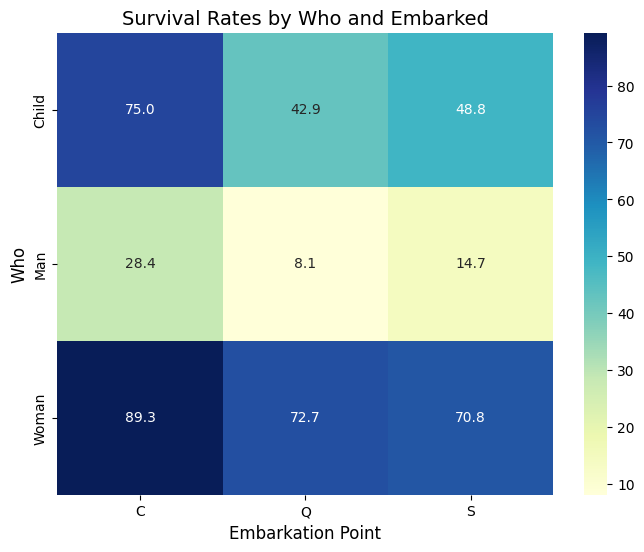

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 56.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 22.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 60.8% of the points cannot be place

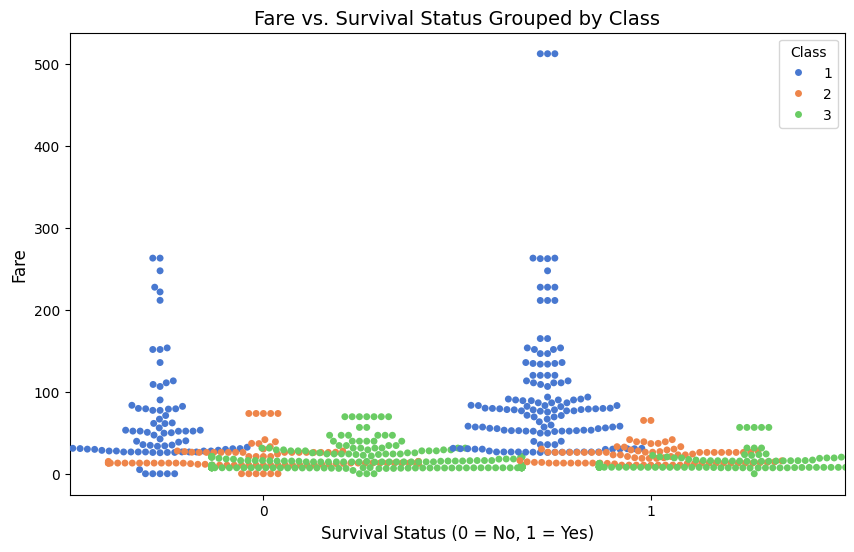

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the Titanic dataset
file_path = "/content/titanic.csv"  # Replace with your file path
titanic_data = pd.read_csv(file_path)

# --- 1. Find the survival rate for passengers who embarked from Queenstown ---
queenstown_passengers = titanic_data[titanic_data['Embarked'] == 'Q']
queenstown_survival_rate = queenstown_passengers['Survived'].mean() * 100
print(f"Survival rate for passengers from Queenstown: {queenstown_survival_rate:.2f}%")

# --- 2. Compare the survival rates for passengers in the lowest fare quartile ---
fare_quartiles = titanic_data['Fare'].quantile([0.25, 0.5, 0.75])
lowest_fare_quartile = titanic_data[titanic_data['Fare'] <= fare_quartiles[0.25]]
lowest_fare_survival_rate = lowest_fare_quartile['Survived'].mean() * 100
print(f"Survival rate for passengers in the lowest fare quartile: {lowest_fare_survival_rate:.2f}%")

# --- 3. Create a bar chart showing survival rates for each age group ---
bins = [0, 18, 35, 50, 65, float('inf')]
labels = ['Children', 'Young Adults', 'Adults', 'Middle-aged', 'Seniors']
titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], bins=bins, labels=labels)
age_group_survival_rates = titanic_data.groupby('AgeGroup')['Survived'].mean() * 100

plt.figure(figsize=(8, 6))
sns.barplot(x=age_group_survival_rates.index, y=age_group_survival_rates.values, palette="viridis")
plt.title("Survival Rates by Age Group", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Survival Rate (%)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# --- 4. Analyze the survival rate for adult males in the second class ---
adult_males_second_class = titanic_data[(titanic_data['Sex'] == 'male') &
                                        (titanic_data['Pclass'] == 2) &
                                        (titanic_data['Age'] >= 18)]
adult_males_second_class_survival_rate = adult_males_second_class['Survived'].mean() * 100
print(f"Survival rate for adult males in the second class: {adult_males_second_class_survival_rate:.2f}%")

# --- 5. Create a heatmap for survival rates based on who and embarked ---
def determine_who(row):
    if row['Age'] < 18:
        return 'Child'
    elif row['Sex'] == 'male':
        return 'Man'
    else:
        return 'Woman'

titanic_data['Who'] = titanic_data.apply(determine_who, axis=1)
heatmap_data = titanic_data.pivot_table(values='Survived', index='Who', columns='Embarked', aggfunc='mean') * 100

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", cbar=True)
plt.title("Survival Rates by Who and Embarked", fontsize=14)
plt.xlabel("Embarkation Point", fontsize=12)
plt.ylabel("Who", fontsize=12)
plt.show()

# --- 6. Generate a swarm plot for fare vs. survival status grouped by class ---
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Survived', y='Fare', hue='Pclass', data=titanic_data, palette='muted', dodge=True)
plt.title("Fare vs. Survival Status Grouped by Class", fontsize=14)
plt.xlabel("Survival Status (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Fare", fontsize=12)
plt.legend(title='Class')
plt.show()
